<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

## Data Processing Workflow

In this workflow within PyCCAPT, we can crop the data, do the voltage and bowl calibration, calculate the 3d reconstruction, and do the ranging.
</div>

In [1]:
# Activate intractive functionality of matplotlib
%matplotlib ipympl
# Activate auto reload 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
# import libraries
import os
import numpy as np
import pandas as pd
import subprocess
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import fixed, interact_manual
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Local module and scripts
from pyccapt.calibration.calibration import widgets as wd
from pyccapt.calibration.data_tools import data_tools, data_loadcrop
from pyccapt.calibration.tutorials.tutorials_helpers import helper_calibration
from pyccapt.calibration.tutorials.tutorials_helpers import helper_data_loader
from pyccapt.calibration.tutorials.tutorials_helpers import helper_temporal_crop
from pyccapt.calibration.tutorials.tutorials_helpers import helper_special_crop
from pyccapt.calibration.tutorials.tutorials_helpers import helper_t_0_tune
from pyccapt.calibration.tutorials.tutorials_helpers import helper_mc_plot
from pyccapt.calibration.tutorials.tutorials_helpers import helper_3d_reconstruction
from pyccapt.calibration.tutorials.tutorials_helpers import helper_ion_selection
from pyccapt.calibration.tutorials.tutorials_helpers import helper_visualization
from pyccapt.calibration.tutorials.tutorials_helpers import helper_ion_list
from pyccapt.calibration.calibration import ion_selection
from pyccapt.calibration.calibration import share_variables
from pyccapt.calibration.leap_tools.leap_tools import read_rrng

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">
In case of recieving the error about pytable library, you have to install the pytables library with conda command. to do that you can open a new cell and copy the line below in it. Then just run it like other cells. The pytables library will be innstalled.
    
`!conda install --yes --prefix {sys.prefix} pytables`
</div>


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">
In the cell below we create variable object. This object is used in many of the functions to share the data between functions in as easy way. 
</div>


In [2]:
variables = share_variables.Variables()

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    
By clicking on the button below, you can select the dataset file you want to work with. The dataset file can be in various formats, including HDF5, EPOS, POS, ATO, and CSV. The cropped data will be saved in the same directory as the original dataset file in a new directory nammed load_crop. The name of the cropped dataset file will be the same as the original dataset file. The figures will be saved in the same directory as the dataset file.
</div>

In [3]:
button = widgets.Button(description='load dataset')

@button.on_click
def open_file_on_click_r(b):
    global dataset_path
    folder_path = variables.last_directory
    script = '..//..//data_tools//run_dataset_path_qt.py'
    cmd = f"python {script} {folder_path}"
    result = subprocess.run(cmd, capture_output=True, text=True, shell=True)
    dataset_path = result.stdout.strip()
    variables.last_directory = dataset_path

button

Button(description='load dataset', style=ButtonStyle())

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

## ROI Selection and Data Cropping
    

</div>



<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

    
From the dropdown lists below, you can select the instrument specifications of the dataset. The instrument specifications are the same as the ones used for the calibration process. Data mode is specify the dataset structure. The dataset can be in raw or calibrated mode. The flight path length is the distance between the sample and the detector. The t0 is the time of flight of the ions with the lowest mass-to-charge ratio. The maximum mass-to-charge ratio is the maximum mass-to-charge ratio of tat you want to plot. You can also change it in te related cells. The detector diameter is the diameter of the detector.
</div>


In [4]:
# create an object for selection of instrument specifications of the dataset
tdc, pulse_mode, flight_path_length, t0, max_mc, det_diam = wd.dataset_instrument_specification_selection()

# Display lists and comboboxes to selected instrument specifications
display(tdc, pulse_mode, flight_path_length, t0, det_diam, max_mc)

Dropdown(description='Data mode:', options=('pyccapt', 'leap_epos', 'leap_pos', 'leap_apt', 'ato_v6'), value='…

Dropdown(description='Pulse mode:', options=('voltage', 'laser'), value='voltage')

FloatText(value=110.0, description='Flight path length:')

FloatText(value=38.0, description='t0:')

FloatText(value=80.0, description='Detector diameter:')

FloatText(value=400.0, description='Max mc:')

In [78]:
helper_data_loader.load_data(dataset_path, max_mc.value, flight_path_length.value, pulse_mode.value, tdc.value, variables)
data_tools.extract_data(variables.data, variables, flight_path_length.value, max_mc.value)
display(variables.data)
display(variables.range_data)

The maximum possible TOF is: 17309 ns
The data will be saved on the path: E:/ai_driven_apt_3d_reconstruction/data/Nimonic 90 Superalloy_Erik/R56_09770-v01_LM_LEAP_rc/data_processing/
The dataset name after saving is: R56_09770-v01_LM_LEAP_rc
The figures will be saved on the path: E:/ai_driven_apt_3d_reconstruction/data/Nimonic 90 Superalloy_Erik/R56_09770-v01_LM_LEAP_rc/data_processing/
Total number of Ions: 9844179
The maximum possible time of flight is: 17309


,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse_v (V),pulse_l (pJ),t (ns),t_c (ns),x_det (cm),y_det (cm),delta_p,multi,start_counter
0,-9.762777,6.067947,3.633320,61.926613,0.0,2336.120117,0.0,0.0,3894.886719,0.0,-0.019202,0.125393,62,1,0
1,0.695408,2.319493,0.147132,53.940742,0.0,2336.120117,0.0,0.0,3753.868652,0.0,-0.034688,-0.022763,152,1,0
2,1.734118,3.074459,0.313951,51.973881,0.0,2336.120117,0.0,0.0,3691.825928,0.0,-0.049524,-0.027997,58,1,0
3,0.974282,-9.012513,2.172342,57.892830,0.0,2336.120117,0.0,0.0,3867.165039,0.0,0.091557,-0.102887,23,1,0
4,-12.462036,-0.085641,4.357419,26.981827,0.0,2336.120117,0.0,0.0,2554.733398,0.0,0.081094,0.109164,124,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844174,3.546847,13.888915,93.694427,57.928997,0.0,7695.790039,0.0,0.0,2139.775146,0.0,-0.097218,-0.001824,230,1,0
9844175,-11.616783,2.130886,92.798866,25.980337,0.0,7695.790039,0.0,0.0,1410.338257,0.0,0.019241,0.036617,308,1,0
9844176,14.079150,-9.819579,94.940720,28.954844,0.0,7695.790039,0.0,0.0,1528.093872,0.0,0.007644,-0.147613,646,1,0
9844177,6.096278,0.119694,91.451447,57.889843,0.0,7695.790039,0.0,0.0,2151.238037,0.0,-0.024889,-0.060914,705,1,0


,name,ion,mass,mc,mc_low,mc_up,color,element,complex,isotope,charge
0,unranged0,un,0.0,0.0,0.0,400.0,#000000,[unranged],[0],[0],0


<div style="margin: 0 auto; padding: 20px;">

Load a pre saved range file if you want from cell below
</div>


In [87]:
button_r = widgets.Button(description='load range dataset')

@button_r.on_click
def open_file_on_click_r(b):
    global range_path
    folder_path = variables.last_directory
    script = '..//..//data_tools//run_dataset_path_qt.py'
    cmd = f"python {script} {folder_path}"
    result = subprocess.run(cmd, capture_output=True, text=True, shell=True)
    range_path = result.stdout.strip()
    variables.last_directory = range_path

button_r

Button(description='load range dataset', style=ButtonStyle())

In [88]:
if 'range_path' in globals():
    _, file_extension = os.path.splitext(range_path)
    if file_extension == '.rrng':
        variables.range_data = read_rrng(range_path)
    else:
        variables.range_data = pd.read_hdf(range_path, mode='r')
display(variables.range_data)

,ion,mass,mc,mc_low,mc_up,color,element,complex,isotope,charge
0,${}^{1}H^{+}$,1.010000,1.000980,0.945341,1.166101,#b2aa2d,[H],[1],[1],1
1,${}^{2}H^{+}$,2.010000,2.001920,1.946281,2.142513,#b2aa2d,[H],[1],[2],1
2,${}^{12}C^{2+}$,6.000000,5.905587,5.837683,6.144295,#daa460,[C],[1],[12],2
3,${}^{12}C^{+}$,12.000000,11.911227,11.855588,12.174464,#daa460,[C],[1],[12],1
4,${}^{13}C^{+}$,13.000000,12.912167,12.881057,13.175404,#daa460,[C],[1],[13],1
5,${}^{27}Al^{2+}$,13.490000,13.412637,13.356999,13.663610,#e7e0d1,[Al],[1],[27],2
6,${}^{28}Si^{2+}$,13.990000,13.913107,13.869733,14.164080,#429806,[Si],[1],[28],2
7,${}^{29}Si^{2+}$,14.490000,14.413578,14.357939,14.676815,#429806,[Si],[1],[29],2
8,${}^{30}Si^{2+}$,14.985000,14.914048,14.882938,15.177285,#429806,[Si],[1],[30],2
9,${}^{17}O^{+}$,17.000000,17.002406,16.922239,17.093941,#1f963a,[O],[1],[17],1


<div style="margin: 0 auto; padding: 20px;">

# Temporal crop

Select the data by drawing a rectangle over the experiment history. Experiment history is a 2D histogram of the time of flight of the ions versus sequence of evaporation. The experiment history is plotted by clicking on the button below te cell.
</div>


In [64]:
helper_temporal_crop.call_plot_crop_experiment(variables, pulse_mode.value)

Output()

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

# Spatial crop

Select the region of maximum concentration of Ions in the below plotted graph to utilize relevant data. To crop you can draw a circle over the filed desorption map. The field desorption map is a 2D histogram of the time of flight of the ions versus the position of the ions on the detector. The field desorption map is plotted by clicking on the button below the cell.
</div>

In [65]:
helper_special_crop.call_plot_crop_fdm(variables)

Output()

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

Calculate pulses since the last event pulse and ions per pulse. The percentage of loss in ROI selection process will be printed.
</div>

In [66]:
# maximum value of the tdc counter
if tdc.value == 'pyccapt':
    if not (variables.data['delta_p'] != 0).any() or not (variables.data['multi'] != 0).any():
        if (variables.data['start_counter'] != 0).any():
            max_start_counter = max(variables.data['start_counter'])
            # if (variables.data['pulse_pi'] == 0).all() or (variables.data['ion_pp'] == 0).all():
            pulse_pi, ion_pp = data_loadcrop.calculate_ppi_and_ipp(variables.data, max_start_counter)
            # add two calculated array to the croped dataset
            variables.data['delta_p'] = pulse_pi.astype(np.uintc)
            variables.data['multi'] = ion_pp.astype(np.uintc)
    
    # save the cropped data
    print('tof Crop Loss {:.2f} %'.format((100 - (len(variables.data) / len(variables.data_backup)) * 100)))
#percentage of double event per pulse
ion_pp = variables.data['multi'].to_numpy()
print('percentage of multihit event per pulse', len(ion_pp[ion_pp != 1]) / float(len(ion_pp)) * 100)

Progress: 0% complete
Progress: 19% complete
Progress: 39% complete
Progress: 59% complete
Progress: 79% complete
Progress: 99% complete
tof Crop Loss 36.75 %
percentage of multihit event per pulse 5.574980261991847


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

In the next cell by changing the t<sub>0</sub> value you can correct the position of H<sub>1</sub> or any other known peak. this correction would be helpful for the position of the peaks in the m/c calibration process.
</div>

In [67]:
data_tools.extract_data(variables.data, variables, flight_path_length.value, max_mc.value)
variables.data

The maximum possible time of flight is: 5010


,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse_v (V),pulse_l (pJ),t (ns),t_c (ns),x_det (cm),y_det (cm),delta_p,multi,start_counter
0,0.0,0.0,0.0,0.0,0.0,4162.9824,624.44736,0.0,960.778368,0.0,0.081633,-1.746939,0,1,7145
1,0.0,0.0,0.0,0.0,0.0,4162.9824,624.44736,0.0,942.741828,0.0,0.378776,-0.525714,602,1,7747
2,0.0,0.0,0.0,0.0,0.0,4162.9824,624.44736,0.0,4041.858312,0.0,0.568163,-0.992653,125,1,7872
3,0.0,0.0,0.0,0.0,0.0,4162.9824,624.44736,0.0,957.534534,0.0,-0.215510,-1.982041,102,1,7974
4,0.0,0.0,0.0,0.0,0.0,4162.9824,624.44736,0.0,952.151004,0.0,0.205714,-0.591020,40,1,8014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62058,0.0,0.0,0.0,0.0,0.0,5373.3312,805.99968,0.0,847.408770,0.0,0.653061,0.346122,79,1,2184
62059,0.0,0.0,0.0,0.0,0.0,5373.3312,805.99968,0.0,830.311776,0.0,-0.757551,-1.776327,237,1,2421
62060,0.0,0.0,0.0,0.0,0.0,5373.3312,805.99968,0.0,835.626726,0.0,-0.754286,-1.825306,56,1,2477
62061,0.0,0.0,0.0,0.0,0.0,5373.3312,805.99968,0.0,849.239856,0.0,-0.767347,-1.838367,21,1,2498


In [68]:
helper_t_0_tune.call_fine_tune_t_0(variables, flight_path_length, pulse_mode, t0)

Output()

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

Remove the data with m/c greater than max m/c and x, y, t = 0. Also add the needed colums for calibration. The data types of the final cropped dataset is displayed below.

</div>

In [69]:
# add the columns in the dataset for x, y, z, mc, mc calibrated, and t calibrated
helper_data_loader.add_columns(variables, max_mc)
# save data temporarily
data_tools.save_data(variables.data, variables, hdf=True, epos=False, pos=False, csv=False, temp=True)
display(variables.data)
display(variables.data.dtypes)

The number of data over max_mc: 0
The number of data with having t, x, and y equal to zero is: 0


,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse_v (V),pulse_l (pJ),t (ns),t_c (ns),x_det (cm),y_det (cm),delta_p,multi,start_counter
0,0.0,0.0,0.0,0.0,61.779333,4162.9824,624.44736,0.0,960.778368,0.0,0.081633,-1.746939,0,1,7145
1,0.0,0.0,0.0,0.0,60.678445,4162.9824,624.44736,0.0,942.741828,0.0,0.378776,-0.525714,602,1,7747
2,0.0,0.0,0.0,0.0,1179.713962,4162.9824,624.44736,0.0,4041.858312,0.0,0.568163,-0.992653,125,1,7872
3,0.0,0.0,0.0,0.0,60.895888,4162.9824,624.44736,0.0,957.534534,0.0,-0.215510,-1.982041,102,1,7974
4,0.0,0.0,0.0,0.0,61.961503,4162.9824,624.44736,0.0,952.151004,0.0,0.205714,-0.591020,40,1,8014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62058,0.0,0.0,0.0,0.0,62.619259,5373.3312,805.99968,0.0,847.408770,0.0,0.653061,0.346122,79,1,2184
62059,0.0,0.0,0.0,0.0,58.470639,5373.3312,805.99968,0.0,830.311776,0.0,-0.757551,-1.776327,237,1,2421
62060,0.0,0.0,0.0,0.0,59.176378,5373.3312,805.99968,0.0,835.626726,0.0,-0.754286,-1.825306,56,1,2477
62061,0.0,0.0,0.0,0.0,61.180372,5373.3312,805.99968,0.0,849.239856,0.0,-0.767347,-1.838367,21,1,2498


x (nm)              float64
y (nm)              float64
z (nm)              float64
mc (Da)             float64
mc_uc (Da)          float64
high_voltage (V)    float64
pulse_v (V)         float64
pulse_l (pJ)        float64
t (ns)              float64
t_c (ns)            float64
x_det (cm)          float64
y_det (cm)          float64
delta_p              uint32
multi                uint32
start_counter        uint32
dtype: object

-------------------------------------------------------
-------------------------------------------------------

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

## Time-of-Flight/Mass-to-charge Calibration
</div>

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    
Below you can plot the ToF histogram of the dataset. You can select the peak range of the data you want to plot by drawing a rectangle over peak with holding left click. After that you should apply the voltage and bowl calibration. These three steps should be repeated until you see no improvement in the peak resolution. You can also save the calibration by clicking on the save button. The saved calibration will be used for the next steps.

</div>

In [70]:
# exctract needed data from Pandas data frame as an numpy array
data_tools.extract_data(variables.data, variables, flight_path_length.value, max_mc.value)

The maximum possible time of flight is: 5010


In [71]:
helper_calibration.call_voltage_bowl_calibration(variables, det_diam.value, flight_path_length.value, pulse_mode.value)

cannot find the maximum for i, j: -28 -16
cannot find the maximum for i, j: -28 -16
cannot find the maximum for i, j: -18 -26
cannot find the maximum for i, j: 12 -26
cannot find the maximum for i, j: -28 14
cannot find the maximum for i, j: -28 -16
cannot find the maximum for i, j: 22 -16
cannot find the maximum for i, j: -28 14
cannot find the maximum for i, j: -23 -21
cannot find the maximum for i, j: -18 -26
cannot find the maximum for i, j: -28 14
cannot find the maximum for i, j: -28 -16
cannot find the maximum for i, j: -18 19
cannot find the maximum for i, j: 7 -26
cannot find the maximum for i, j: 17 -21
cannot find the maximum for i, j: 12 -21
cannot find the maximum for i, j: -18 19
cannot find the maximum for i, j: 12 -26
cannot find the maximum for i, j: 12 24
cannot find the maximum for i, j: -18 -26
cannot find the maximum for i, j: -13 -26
cannot find the maximum for i, j: -18 14
cannot find the maximum for i, j: 12 24
cannot find the maximum for i, j: 12 -26
cannot fin

In [72]:
variables.dld_t_calib_backup = np.copy(variables.dld_t_calib)
variables.mc_calib_backup = np.copy(variables.mc_calib)

In [73]:
helper_ion_list.call_ion_list(variables, selector='peak')

In [74]:
variables.data['mc (Da)'] = variables.mc_calib
variables.data['t_c (ns)'] = variables.dld_t_calib
# Remove negative mc
threshold = 0
mc_t = variables.data['mc (Da)'].to_numpy()
mc_t_mask = (mc_t <= threshold)
print('The number of ions with negative mc are:', len(mc_t_mask[mc_t_mask==True]))
variables.data.drop(np.where(mc_t_mask)[0], inplace=True)
variables.data.reset_index(inplace=True, drop=True)
# save data temporarily
data_tools.save_data(variables.data, variables, hdf=True, epos=False, pos=False, csv=False, temp=True)

The number of ions with negative mc are: 0


In [75]:
helper_mc_plot.call_mc_plot(variables, selector='None')

Output()

-------------------------------------------------------
-------------------------------------------------------

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

## 3D Reconstruction
After bowl and voltage calibration we are ready to calculate the 3d reconstruction. In this workflow we calculate the reconstructed x,y,z and then plot the 3d, heatmap, projection plots and mass-to-charge histogram.

</div>

In [117]:
# exctract needed data from Pandas data frame as a numpy array
data_tools.extract_data(variables.data, variables, flight_path_length.value, max_mc.value)

display(variables.data)

The maximum possible time of flight is: 5010


,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse_v (V),pulse_l (pJ),t (ns),t_c (ns),x_det (cm),y_det (cm),delta_p,multi,start_counter
0,0.0,0.0,0.0,291.603958,337.930638,2756.760,413.5140,0.0,2720.397150,2720.397150,-2.305306,-0.463673,0,1,11261
1,0.0,0.0,0.0,52.048375,60.914120,2756.760,413.5140,0.0,1156.567410,1156.567410,0.336327,-0.662857,434,1,11695
2,0.0,0.0,0.0,912.603029,1045.489797,2756.760,413.5140,0.0,4671.902772,4671.902772,0.933878,-0.577959,127,1,11822
3,0.0,0.0,0.0,2.032917,2.293805,2760.272,414.0408,0.0,260.535420,260.535420,-1.760000,-0.395102,4294957988,2,2514
4,0.0,0.0,0.0,107.763307,125.636042,2760.272,414.0408,0.0,1664.950950,1664.950950,-1.946122,-0.574694,0,2,2514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174377,0.0,0.0,0.0,2.030232,2.247022,3704.728,555.7092,0.0,226.739196,226.739196,-0.457143,-0.669388,4294955133,1,56
174378,0.0,0.0,0.0,554.698683,648.738985,3704.728,555.7092,0.0,3222.855378,3222.855378,0.659592,1.867755,83,1,139
174379,0.0,0.0,0.0,55.443597,64.970739,3704.728,555.7092,0.0,1035.798030,1035.798030,-0.783673,0.382041,292,1,431
174380,0.0,0.0,0.0,2.008297,2.211491,3704.728,555.7092,0.0,225.566478,225.566478,-0.336327,-0.966531,745,1,1176


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

You have to select the main element in your sample from the from dropdown below.
</div>

In [81]:
element_selected = wd.density_field_selection()
display(element_selected)

Dropdown(description='Element', options=((1, 'H', 52.7, 0.0), (2, 'He', 28.7, 0.0), (3, 'Li', 46.3, 14.0), (4,…

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

In case that yopu face error about plotly library, like javascripts error. You have check your jupyter lab version is compatibale with the plotly extenstion. Sometimes running `jupyter lab build` command fix the proble.
</div>

In [85]:
flight_path_length.value = 3.5

In [86]:
flight_path_length.value

3.5

In [90]:
helper_3d_reconstruction.call_x_y_z_calculation(variables, flight_path_length, element_selected=element_selected)

Output()

In [ ]:
variables.x

In [23]:
variables.data['x (nm)'] = variables.x
variables.data['y (nm)'] = variables.y
variables.data['z (nm)'] = variables.z
# save data temporarily
data_tools.save_data(variables.data, variables, hdf=True, epos=False, pos=False, csv=False, temp=True)

-------------------------------------------------------
-------------------------------------------------------

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

## Ion Selection and Rangging

Users can choose ions using peak and element finders, manually add ions, customize ion colors, and create histograms. Histograms can be generated for selected ranges and areas, and figures can be saved. Additionally, users have the option to save both statistics and  range data.

</div>

In [79]:
# exctract needed data from Pandas data frame as an numpy array
data_tools.extract_data(variables.data, variables, flight_path_length.value, max_mc.value)

display(variables.data)

The maximum possible time of flight is: 17309


,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse_v (V),pulse_l (pJ),t (ns),t_c (ns),x_det (cm),y_det (cm),delta_p,multi,start_counter
0,-9.762777,6.067947,3.633320,61.926613,0.0,2336.120117,0.0,0.0,3894.886719,0.0,-0.019202,0.125393,62,1,0
1,0.695408,2.319493,0.147132,53.940742,0.0,2336.120117,0.0,0.0,3753.868652,0.0,-0.034688,-0.022763,152,1,0
2,1.734118,3.074459,0.313951,51.973881,0.0,2336.120117,0.0,0.0,3691.825928,0.0,-0.049524,-0.027997,58,1,0
3,0.974282,-9.012513,2.172342,57.892830,0.0,2336.120117,0.0,0.0,3867.165039,0.0,0.091557,-0.102887,23,1,0
4,-12.462036,-0.085641,4.357419,26.981827,0.0,2336.120117,0.0,0.0,2554.733398,0.0,0.081094,0.109164,124,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844174,3.546847,13.888915,93.694427,57.928997,0.0,7695.790039,0.0,0.0,2139.775146,0.0,-0.097218,-0.001824,230,1,0
9844175,-11.616783,2.130886,92.798866,25.980337,0.0,7695.790039,0.0,0.0,1410.338257,0.0,0.019241,0.036617,308,1,0
9844176,14.079150,-9.819579,94.940720,28.954844,0.0,7695.790039,0.0,0.0,1528.093872,0.0,0.007644,-0.147613,646,1,0
9844177,6.096278,0.119694,91.451447,57.889843,0.0,7695.790039,0.0,0.0,2151.238037,0.0,-0.024889,-0.060914,705,1,0


In [7]:
display(variables.data.dtypes)

x (nm)              float32
y (nm)              float32
z (nm)              float32
mc (Da)             float32
mc_uc (Da)          float64
high_voltage (V)    float32
pulse               float32
t (ns)              float32
t_c (ns)            float64
x_det (cm)          float32
y_det (cm)          float32
delta_p               int32
multi                 int32
start_counter         int32
dtype: object

In [8]:
helper_ion_selection.call_ion_selection(variables)

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

Now we can also show the color in the range dataframe

</div>

In [9]:
display(variables.range_data.style.applymap(ion_selection.display_color, subset=['color']))

,name,ion,mass,mc,mc_low,mc_up,color,element,complex,isotope,charge
0,H1,${}^{1}H^{+}$,1.010000,0.958999,0.926484,1.318946,#b2aa2d,['H'],[1],[1],1.000000
1,H2,${}^{1}H_{2}^{+}$,2.020000,2.057186,1.938820,2.343547,#b2aa2d,['H'],[2],[1],1.000000
2,C1,${}^{13}C^{+}$,13.000000,13.438397,13.405882,13.602113,#daa460,['C'],[1],[13],1.000000
3,Ga1,${}^{69}Ga^{2+}$,34.465000,34.403785,34.248626,34.800526,#58c7ac,['Ga'],[1],[69],2.000000
4,W1,${}^{180}W^{4+}$,44.987500,45.385656,45.328611,45.598429,#ab70d5,['W'],[1],[180],4.000000
5,W1,${}^{182}W^{4+}$,45.487500,45.685161,45.640381,45.848877,#ab70d5,['W'],[1],[182],4.000000
6,W1,${}^{183}W^{4+}$,45.737500,45.884832,45.852316,46.146663,#ab70d5,['W'],[1],[183],4.000000
7,W1,${}^{184}W^{4+}$,45.987500,46.384007,46.314699,46.645839,#ab70d5,['W'],[1],[184],4.000000
8,W1,${}^{180}W^{3+}$,59.983300,59.961592,59.806432,60.198895,#ab70d5,['W'],[1],[180],3.000000
9,W1,${}^{182}W^{3+}$,60.650000,60.560603,60.429973,60.822435,#ab70d5,['W'],[1],[182],3.000000


In [10]:
variables.range_data.dtypes

name        object
ion         object
mass       float64
mc         float64
mc_low     float64
mc_up      float64
color       object
element     object
complex     object
isotope     object
charge     float64
dtype: object

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

Save the range in the hdf5 and csv format.

</div>

In [11]:
interact_manual_range = interact_manual.options(manual_name="save range")
interact_manual_range(data_tools.save_range, variables=fixed(variables));

interactive(children=(Button(description='save range', style=ButtonStyle()), Output()), _dom_classes=('widget-…

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

Save the cropped dataset. You can specify te output format from list below. The output formats are HDF5, EPOS, POS, ATO, and CSV. The output file will be saved in the same directory as the original dataset file in a new directory nammed load_crop.
</div>

In [80]:
interact_manual_data = interact_manual.options(manual_name="save data")
interact_manual_data(data_tools.save_data, data=fixed(variables.data), variables=fixed(variables),
                name=widgets.Text(value=variables.result_data_name),
                hdf=widgets.Dropdown(options=[('True', True), ('False', False)]),
                epos=widgets.Dropdown(options=[('False', False), ('True', True)]),
                pos=widgets.Dropdown(options=[('False', False), ('True', True)]),
                ato_6v=widgets.Dropdown(options=[('False', False), ('True', True)]),
                csv=widgets.Dropdown(options=[('False', False), ('True', True)]),
               temp=fixed(False));

interactive(children=(Text(value='R56_09770-v01_LM_LEAP_rc', continuous_update=False, description='name'), Dro…

-------------------------------------------------------
-------------------------------------------------------

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    
# Visualization
    
</div>

In [21]:
variables.data

,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse,t (ns),t_c (ns),x_det (cm),y_det (cm),delta_p,multi,start_counter
0,3.670057,1.533948,3638,43.990879,0.0,1825.0,0.0,4003.641113,0.0,0.544589,0.186350,0,1,0
1,3.950638,2.391691,3640,44.062805,0.0,1825.0,0.0,4007.589844,0.0,0.592641,0.291679,15742,1,0
2,4.524287,1.771838,3641,3.958121,0.0,1825.0,0.0,1202.503052,0.0,0.667388,0.213358,10244,1,0
3,4.273866,1.442511,3643,44.056522,0.0,1825.0,0.0,4010.150879,0.0,0.630014,0.172847,4125,1,0
4,-1.369881,-3.804785,3644,44.010208,0.0,1825.0,0.0,3967.814941,0.0,-0.149495,-0.467226,1584,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726479,5.373492,6.425176,756762,65.865189,0.0,5466.5,0.0,2830.184082,0.0,0.517893,0.491533,266,1,0
726480,-6.215190,-7.837495,756764,15.990255,0.0,5466.5,0.0,1375.950073,0.0,-0.477850,-0.594161,279,1,0
726481,3.688046,4.832221,756766,63.918850,0.0,5466.5,0.0,2785.050049,0.0,0.363059,0.372701,1974,1,0
726482,-1.097841,0.862023,756767,130.006042,0.0,5466.5,0.0,3952.087891,0.0,-0.050722,0.081022,20,1,0


# helper_visualization.call_visualization(variables)

In [19]:
data_tools.extract_data(variables.data, variables, flight_path_length.value, max_mc.value)

The maximum possible time of flight is: 18220


In [23]:
helper_visualization.call_visualization(variables)

In [26]:
mask_h1 = (variables.mc <1.11) & (variables.mc > 0.89)
mask_h2 = (variables.mc <2.2) & (variables.mc > 1.87)
h1 = variables.mc[mask_h1]
h2 = variables.mc[mask_h2]
voltage = variables.dld_high_voltage

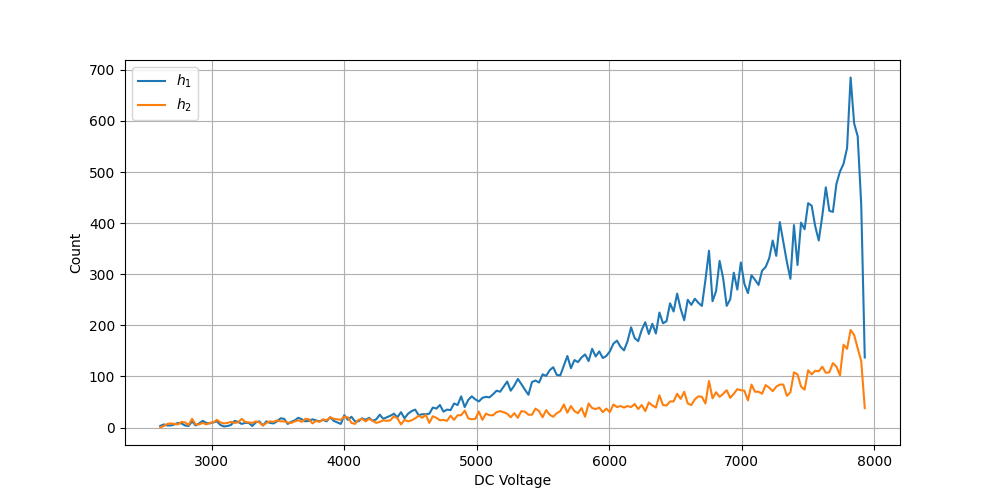

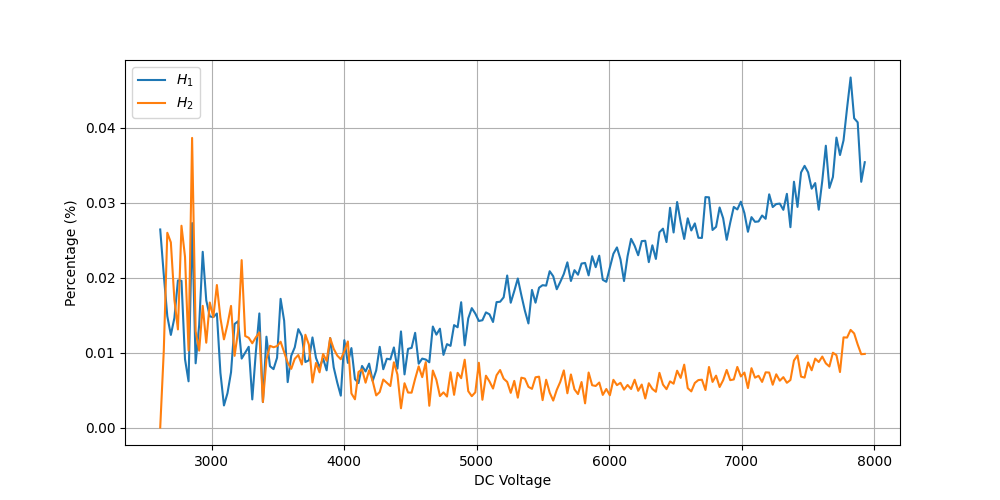

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_mc_vs_voltage_steps(variables, num_steps=100):
    """
    Plots the amount or percentage of h1 and h2 vs voltage, dividing the voltage
    range into specified steps.

    Args:
        variables: DataFrame or object with 'mc' and 'high_voltage' columns.
        num_steps: Number of steps to divide the voltage range into.
    """

    min_voltage = variables.dld_high_voltage.min()
    max_voltage = variables.dld_high_voltage.max()
    voltage_values = np.linspace(min_voltage, max_voltage, num_steps)

    h1_amounts = []
    h2_amounts = []
    h1_percentages = []
    h2_percentages = []

    for voltage in voltage_values:
        # Create a boolean mask to select data points within a small voltage range
        # around the current voltage step.
        voltage_mask = (variables.dld_high_voltage >= voltage - (max_voltage - min_voltage) / (2 * num_steps)) & \
                       (variables.dld_high_voltage <= voltage + (max_voltage - min_voltage) / (2 * num_steps))
        # voltage_data = variables[voltage_mask]
        mc_masked = variables.mc[voltage_mask]

        mask_h1 = (mc_masked < 1.11) & (mc_masked > 0.89)
        mask_h2 = (mc_masked < 2.2) & (mc_masked > 1.87)

        h1 = mc_masked[mask_h1]
        h2 = mc_masked[mask_h2]

        h1_amounts.append(len(h1))
        h2_amounts.append(len(h2))

        total_count = len(mc_masked)
        if total_count > 0:
            h1_percentages.append((len(h1) / total_count) * 100)
            h2_percentages.append((len(h2) / total_count) * 100)
        else:
            h1_percentages.append(0)
            h2_percentages.append(0)

    # Plotting amounts
    plt.figure(figsize=(10, 5))
    plt.plot(voltage_values, h1_amounts, label=r'$h_1$')
    plt.plot(voltage_values, h2_amounts, label=r'$h_2$')
    plt.xlabel('DC Voltage')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting percentages
    plt.figure(figsize=(10, 5))
    plt.plot(voltage_values, h1_percentages, label=r'$H_1$')
    plt.plot(voltage_values, h2_percentages, label=r'$H_2$')
    plt.xlabel('DC Voltage')
    plt.ylabel('Percentage (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage (assuming 'variables' is your DataFrame):
plot_mc_vs_voltage_steps(variables, num_steps=200)

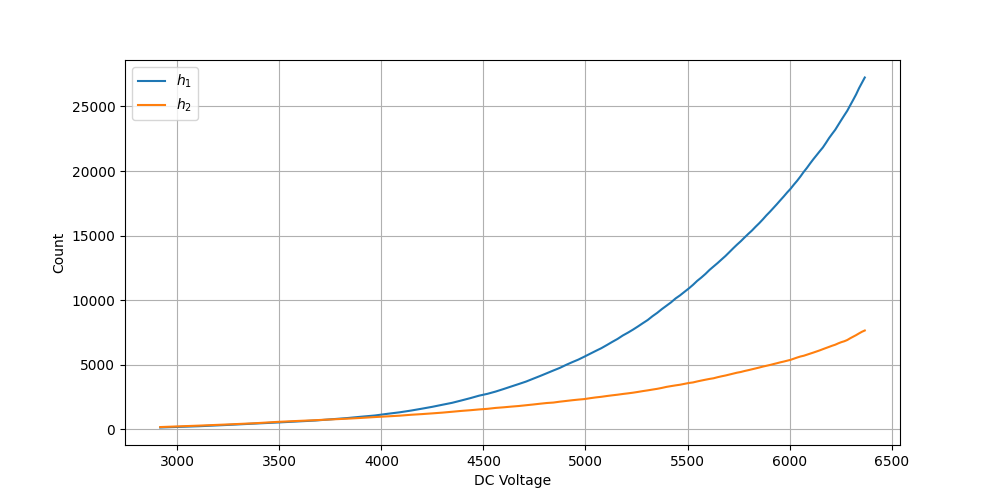

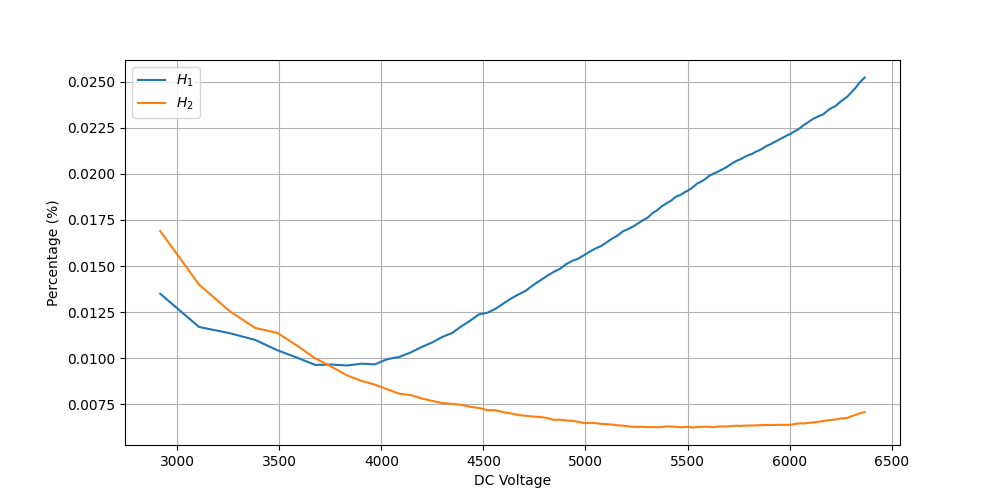

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_mc_vs_voltage_constant_count(variables, range_devide=1_000_000):
    """
    Plots the amount or percentage of h1 and h2 vs voltage, dividing the voltage
    range based on a constant number of data points per range.

    Args:
        variables: DataFrame or object with 'dld_high_voltage' and 'mc' columns.
        num_per_range: Number of data points per voltage range.
    """

    num_range = int(len(variables.dld_high_voltage) / range_devide)
    voltage_values = []
    h1_amounts = []
    h2_amounts = []
    h1_percentages = []
    h2_percentages = []

    for i in range(num_range):
        if i * range_devide < len(variables.dld_high_voltage):
            dld_high_voltage_masked = variables.dld_high_voltage[i:i * range_devide]
            mc_masked = variables.mc[i:i * range_devide]
        else:
            dld_high_voltage_masked = variables.dld_high_voltage[i:]
            mc_masked = variables.mc[i:]
        
        voltage = dld_high_voltage_masked.mean()  # Use mean voltage for the range

        voltage_values.append(voltage)

        mask_h1 = (mc_masked < 1.11) & (mc_masked > 0.89)
        mask_h2 = (mc_masked < 2.2) & (mc_masked > 1.87)

        h1 = mc_masked[mask_h1]
        h2 = mc_masked[mask_h2]

        h1_amounts.append(len(h1))
        h2_amounts.append(len(h2))

        total_count = len(mc_masked)
        if total_count > 0:
            h1_percentages.append((len(h1) / total_count) * 100)
            h2_percentages.append((len(h2) / total_count) * 100)
        else:
            h1_percentages.append(0)
            h2_percentages.append(0)

    # Plotting amounts
    plt.figure(figsize=(10, 5))
    plt.plot(voltage_values, h1_amounts, label=r'$h_1$')
    plt.plot(voltage_values, h2_amounts, label=r'$h_2$')
    plt.xlabel('DC Voltage')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting percentages
    plt.figure(figsize=(10, 5))
    plt.plot(voltage_values, h1_percentages, label=r'$H_1$')
    plt.plot(voltage_values, h2_percentages, label=r'$H_2$')
    plt.xlabel('DC Voltage')
    plt.ylabel('Percentage (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage (assuming 'variables' is your DataFrame):
plot_mc_vs_voltage_constant_count(variables, range_devide=1_000_000)

In [40]:
variables.plotly_3d_reconstruction.show()

In [ ]:
from IPython.display import display, HTML
display(HTML(variables.animation_detector_html))